# 5 Modelling - Task 3

## Import and Initializing

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model, metrics, preprocessing, pipeline  # pip3 install sklearn --user
from scipy import optimize
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

FIGSIZE = (16,4)

In [2]:
dataset = pd.read_excel("../datasets/DB01_gaming_video_quality_dataset.xlsx")

# calculate MOS
mos_by_game_condition = dataset.groupby(["Game", "Condition"]).mean()

#calculate bit per pixel
num_pixels = {
    480: 720 * 480,
    720: 1280 * 720,
    1080: 1920 * 1080
}

def count_pixels(resolution):
    return num_pixels[int(resolution)]

mos_by_game_condition["num_pixels"] = mos_by_game_condition.Resolution.transform(count_pixels)
mos_by_game_condition["bitperpixel"] = mos_by_game_condition.Bitrate / mos_by_game_condition.num_pixels

## Perform multiple linear regression

In [3]:
X = mos_by_game_condition[["VF", "VU", "VD"]].values
y = mos_by_game_condition[["VQ"]].values

model = linear_model.LinearRegression()
model.fit(X, y)
None

RMSE=0.15037739916835693
R^2=0.9754794697815229
Spearman correlation: 0.9860842900194534


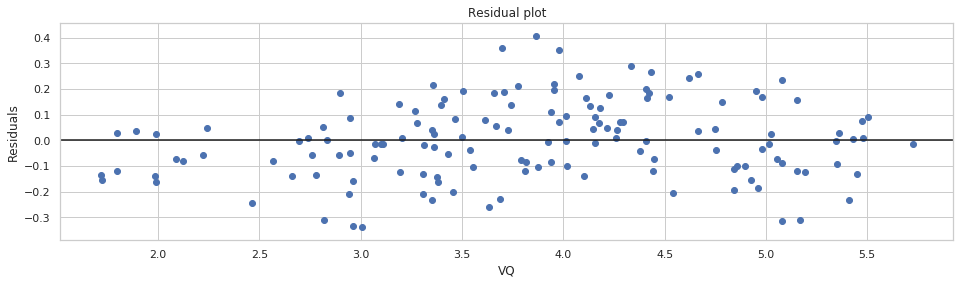

In [4]:
prediction = model.predict(X)
residuals = y - prediction

# Residual plot

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(y, residuals)

padding = 0.2
min_x = y.min() - padding
max_x = y.max() + padding
ax.hlines(0, min_x, max_x)
ax.set_xlim([min_x, max_x])

ax.set_title("Residual plot")
ax.set_ylabel("Residuals")
ax.set_xlabel("VQ")

# Report results

MSE = (residuals ** 2).mean()
RMSE = np.sqrt(MSE)
print(f"RMSE={RMSE}")

r_squared = metrics.r2_score(y, prediction)
print(f"R^2={r_squared}")

spearman = spearmanr(prediction, mos_by_game_condition[["VQ"]].values)
print(f"Spearman correlation: {spearman[0]}")